In [1]:
import cv2
from matplotlib import pyplot as plt
import imutils
import base64
import numpy as np
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

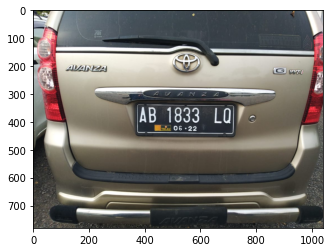

In [3]:
img = cv2.imread(r'dataset/AB1833LQ.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

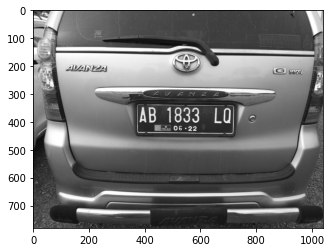

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

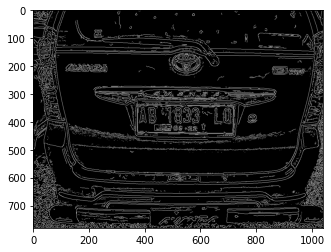

In [6]:
blur = cv2.bilateralFilter(gray, 9, 75, 75)
th = cv2.Canny(blur, 9, 17, 17)
# th = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
plt.imshow(cv2.cvtColor(th, cv2.COLOR_BGR2RGB))

In [7]:
# th = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
# plt.imshow(cv2.cvtColor(th, cv2.COLOR_BGR2RGB))

In [8]:
imgcnt = th.copy()

cnt = cv2.findContours(imgcnt,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cnt = imutils.grab_contours(cnt)
cnt = sorted(cnt,key=cv2.contourArea,reverse = True)[:10]

# detected = None
screencnt = None
for c in cnt:
    
    peri = cv2.arcLength(c,True)
    approx = cv2.approxPolyDP(c,0.02*peri,True)
    #if there are four DP 
    if len(approx) == 4:
        screencnt = approx
            #detected == 1
        break

#masking other part
mask = np.zeros(gray.shape,np.uint8)

In [9]:
print (screencnt)

[[[394 294]]

 [[602 285]]

 [[701 303]]

 [[497 315]]]


In [10]:
try:
    new_image = cv2.drawContours(mask,[screencnt],0,255,-1)
    new_image = cv2.bitwise_and(img,img,mask=mask)
    #cropping process
    (x,y) = np.where(mask ==255)
    (topx,topy) = (np.min(x),np.min(y))
    (bottomx,bottomy) = (np.max(x),np.max(y))
    cropped = edged[topx:bottomx+1, topy:bottomy+1]
    blur = cv2.GaussianBlur(cropped,(5,5),0)
    ret,th = cv2.threshold(blur,127,255,cv2.THRESH_BINARY_INV)
    text = pytesseract.image_to_string(th,config='--psm ')
except:
     print('no detected contour')


no detected contour


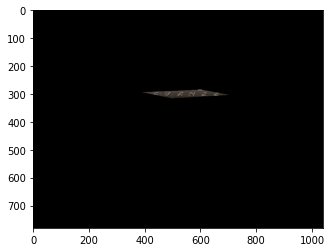

In [11]:
plt.imshow(new_image)

In [ ]:
# print(Plat Number text & image)
plt.imshow(cv2.cvtColor(th, cv2.COLOR_BGR2RGB))

In [ ]:
img = cv2.cvtColor(th, cv2.COLOR_BGR2RGB)
hImg, wImg,_ = img.shape
boxes = pytesseract.image_to_boxes(img,config='--psm 7')
for b in boxes.splitlines():
    b = b.split(' ')
    x, y, w, h = int(b[1]), int(b[2]), int(b[3]), int(b[4])
    cv2.rectangle(img, (x,hImg- y), (w,hImg- h), (50, 50, 255), 2)
    cv2.putText(img,b[0],(x,hImg- y+25),cv2.FONT_HERSHEY_SIMPLEX,1,(50,50,255),2)

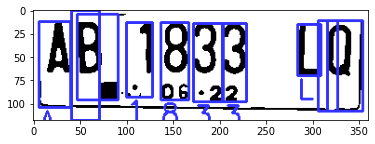

In [ ]:
plt.imshow(img)